In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h1 = "Playing with Pandas" align="center"/>

<p align="center">
    <h1 align="center">Playing with Pandas</h1>
   <img src="playing_with_pandas/pandas.jpg" width="600px" >
</p>

### Pandas

 * Different ways to read the data into dataframe.
 * Slice and dice.
 * Take a look and describe the data.
 * 


### Creating a dataframe

In [59]:
sample_df = pd.DataFrame(columns=['A','B','C'],data=[[1,2,3],[4,5,6],[7,8,9]],dtype='float')

In [60]:
sample_df.head()

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0


### Read S&P 500 constituents

In [17]:
?pd.read_csv

In [19]:
!ls playing_with_pandas/SNP_500_companies/

constituents-financials_csv.csv
constituents_csv.csv
s-and-p-500-companies-financials_zip.zip


In [22]:
constituents_df = pd.read_csv("playing_with_pandas/SNP_500_companies/constituents_csv.csv")

In [36]:
constituents_financials_df = pd.read_csv("playing_with_pandas/SNP_500_companies/constituents-financials_csv.csv")

In [23]:
constituents_df.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [25]:
constituents_df.shape

(505, 3)

In [28]:
constituents_df['Sector'][:10]

0               Industrials
1               Industrials
2               Health Care
3               Health Care
4    Information Technology
5    Information Technology
6               Industrials
7    Information Technology
8    Consumer Discretionary
9    Information Technology
Name: Sector, dtype: object

### Accessing an index in a dataframe

In [85]:
constituents_df.iloc[5]

Symbol                      ATVI
Name         Activision Blizzard
Sector    Information Technology
Name: 5, dtype: object

In [84]:
constituents_df[constituents_df['Symbol']=='MMM']

,Symbol,Name,Sector
0,MMM,3M Company,Industrials


### We can have multiple criteria as well

In [93]:
constituents_df[(constituents_df['Sector']=='Information Technology')&(constituents_df['Name'].str.startswith('A'))]

,Symbol,Name,Sector
4,ACN,Accenture plc,Information Technology
5,ATVI,Activision Blizzard,Information Technology
7,ADBE,Adobe Systems Inc,Information Technology
9,AMD,Advanced Micro Devices Inc,Information Technology
16,AKAM,Akamai Technologies Inc,Information Technology
24,ADS,Alliance Data Systems,Information Technology
27,GOOGL,Alphabet Inc Class A,Information Technology
28,GOOG,Alphabet Inc Class C,Information Technology
42,APH,Amphenol Corp,Information Technology
44,ADI,"Analog Devices, Inc.",Information Technology


### sort the values by certain columns of dataframe

In [110]:
constituents_df.sort_values(by='Sector',inplace=True)

In [115]:
constituents_df.head()

,Symbol,Name,Sector
0,DLTR,Dollar Tree,Consumer Discretionary
1,ORLY,O'Reilly Automotive,Consumer Discretionary
2,AZO,AutoZone Inc,Consumer Discretionary
3,FOX,Twenty-First Century Fox Class B,Consumer Discretionary
4,SNI,Scripps Networks Interactive Inc.,Consumer Discretionary


In [92]:
constituents_df.Sector.nunique()

11

In [129]:
dict(map(lambda x : (x,constituents_df[x].isna().any()), constituents_df.columns))

{'Symbol': False, 'Name': False, 'Sector': False}

### Let's see which all sectors are part of S&P 500

In [34]:
constituents_df.Sector.unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

### Let's see how many are there per sector

In [35]:
constituents_df.groupby('Sector').agg('count')

,Symbol,Name
Sector,,
Consumer Discretionary,84,84
Consumer Staples,34,34
Energy,32,32
Financials,68,68
Health Care,61,61
Industrials,67,67
Information Technology,70,70
Materials,25,25
Real Estate,33,33


In [46]:
constituents_df.Sector.value_counts()

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [37]:
constituents_financials_df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [38]:
constituents_financials_df.shape

(505, 14)

### Let's see max P/E ratio for each sector.

In [40]:
constituents_financials_df.groupby('Sector').agg({'Price/Earnings': 'max'})

,Price/Earnings
Sector,
Consumer Discretionary,296.16
Consumer Staples,42.17
Energy,305.56
Financials,35.06
Health Care,252.67
Industrials,32.75
Information Technology,520.15
Materials,49.43
Real Estate,199.81


In [ ]:
get_

In [44]:
??constituents_financials_df.plot

### Visualizing the data

In [70]:
finance_industry_df = constituents_financials_df[constituents_financials_df['Sector']=='Financials']

In [71]:
finance_industry_df.shape

(68, 13)

### Let's see company name v/s Earnings/share

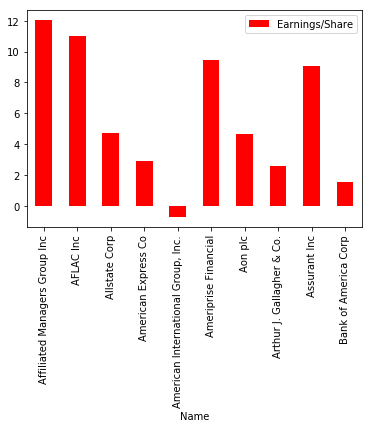

In [76]:
finance_industry_df[:10].plot(kind='bar', x='Name',y='Earnings/Share',color='Red')

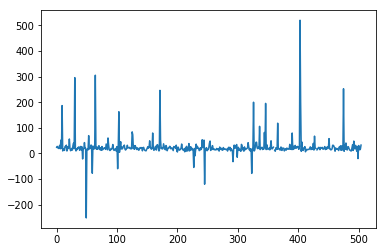

In [69]:
constituents_financials_df['Price/Earnings'].plot(kind='line')

### Multiple plots on one axis

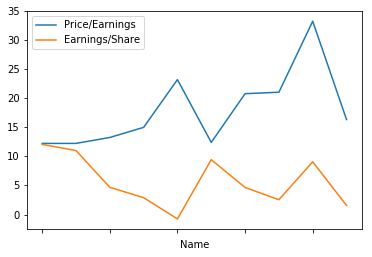

In [81]:
ax = plt.gca()

finance_industry_df[:10].plot(x='Name',y='Price/Earnings',kind='line',ax=ax)
finance_industry_df[:10].plot(x='Name',y='Earnings/Share',kind='line',ax=ax)

plt.show()

In [48]:
constituents_financials_df.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [52]:
constituents_financials_df.drop('SEC Filings',axis=1,inplace=True)

In [94]:
constituents_financials_df['is_an_over_priced_stock'] = constituents_financials_df['Price/Earnings'] > 20

### Using groupby and aggregate on pandas dataframe

In [150]:
agg_policy = {'Price/Book' : max,'Price/Sales':min,'Earnings/Share': 'mean', 'Market Cap' : lambda x : str(x).split('\n')}

In [151]:
constituents_financials_df.groupby('Sector').aggregate(agg_policy)

,Price/Book,Price/Sales,Earnings/Share,Market Cap
Sector,,,,
Consumer Discretionary,1403.38,0.270541,4.879048,"[8 8123611867, 30 685873374731, 53 ..."
Consumer Staples,1318.70,0.279613,3.659412,"[29 126985101434, 54 23594770663, 82 ..."
Energy,4.74,0.407652,-1.648437,"[43 32129091747, 45 15696449735, 49 ..."
Financials,205.41,0.698658,4.436912,"[12 10442174371, 13 33422948000, 26 ..."
Health Care,196.21,0.153186,4.340492,"[2 102121042306, 3 181386347059, 11 ..."
Industrials,182.86,0.502050,5.344030,"[0 138721055226, 1 10783419933, 6 ..."
Information Technology,224.13,0.787766,3.110000,"[4 98765855553, 5 52518668144, 7 ..."
Materials,13.42,0.998376,4.932000,"[15 34638387128, 18 11782151266, 63 ..."
Real Estate,91.04,1.462232,2.391212,"[19 12043374429, 36 59213892640, 50 ..."


In [135]:
??constituents_financials_df.sort_values

### Let's just validate what we have done is correct.

In [137]:
constituents_financials_df[constituents_financials_df.Sector=='Consumer Staples'].sort_values(by='Price/Book',ascending=False)[:1]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,is_an_over_priced_stock
363,PM,Philip Morris International,Consumer Staples,100.39,22.36,4.328479,4.48,123.55,96.66,153580671803,1.180200e+10,2.757469,1318.7,True
